# Vibração Forçada 2GL -- Visualização

Neste notebook vemos uma visualização do movimento e das magnitudes relativas das forças que agem um
problema de vibração forçada com dois graus de liberdade.

<img src="exemplo_forced.png">

Vamos tratar deste problema específico, com $F_1 = 0$, $F_2 = 1\,\mathrm{N}$,  $m_1 = 1\,\mathrm{kg}$,
$m_2 = 2\,\mathrm{kg}$, $c_1 = 0.2\,\mathrm{kg/s}$, $c_3 = 0.15\,\mathrm{kg/s}$, $k_2 = 40\,\mathrm{N/m}$,
$k_3 = 30\,\mathrm{N/m}$.

A força $F_2$ é harmônica, mas a frequência será variável para estudarmos os diferentes comportamentos.


##  Setup

In [54]:
import sympy as sp
from sympy import I
from sympy.abc import t

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.collections import PatchCollection
from matplotlib import animation
from IPython.display import HTML

## Sistema mecânico
Vamos definir o sistema mecânico com as matrizes de massa, rigidez e amortecimento.

In [55]:
m = sp.Matrix([[1, 0],
               [0, 2]])
c = sp.Matrix([[0.2, 0],
               [0.0, 0.15]])
k = sp.Matrix([[40.0, -40.0],
               [-40.0, 70.0]])

## Força externa

In [56]:
F0 = sp.Matrix([0.0, 1.0])

## Frequências naturais
Apesar de não ser estritamente necessário, sempre é bom calcular as frequências naturais do problema, para ajudar a entender o comportamento.

In [57]:
ω_n = sp.symbols('ω_n')
Z0 = k - ω_n**2 * m
display(Z0)

Matrix([
[40.0 - ω_n**2,           -40.0],
[        -40.0, 70.0 - 2*ω_n**2]])

### Equação característica

In [58]:
eqc = sp.det(Z0)
display(eqc)

2*ω_n**4 - 150.0*ω_n**2 + 1200.0

In [59]:
roots = sp.solve(eqc, ω_n)
roots = [ r for r in roots if r > 0]
print(roots)
ω_1 = min(roots)
ω_2 = max(roots)

[3.01752518978693, 8.11754530193712]


## Matriz de impedância mecânica
A matriz de impedância mecânica é

In [60]:
ω = sp.symbols('ω', real=True)
Ziw = k - ω**2*m + I*ω*c
display(Ziw)

Matrix([
[-ω**2 + 0.2*I*ω + 40.0,                     -40.0],
[                 -40.0, -2*ω**2 + 0.15*I*ω + 70.0]])

In [61]:
Ziw.inv()

Matrix([
[(-80.0*ω**2 + 6.0*I*ω + 2800.0)/(80.0*ω**4 - 22.0*I*ω**3 - 6001.2*ω**2 + 800.0*I*ω + 48000.0),                    1600.0/(80.0*ω**4 - 22.0*I*ω**3 - 6001.2*ω**2 + 800.0*I*ω + 48000.0)],
[                              40.0/(2.0*ω**4 - 0.55*I*ω**3 - 150.03*ω**2 + 20.0*I*ω + 1200.0), (-1.0*ω**2 + 0.2*I*ω + 40.0)/(2.0*ω**4 - 0.55*I*ω**3 - 150.03*ω**2 + 20.0*I*ω + 1200.0)]])

## Resolvendo para os deslocamentos

In [62]:
X = Ziw.inv()*F0
display(X)

Matrix([
[                       1600.0/(80.0*ω**4 - 22.0*I*ω**3 - 6001.2*ω**2 + 800.0*I*ω + 48000.0)],
[1.0*(-1.0*ω**2 + 0.2*I*ω + 40.0)/(2.0*ω**4 - 0.55*I*ω**3 - 150.03*ω**2 + 20.0*I*ω + 1200.0)]])

Percebam que os deslocamentos são complexos, com magnitude e fase.

## Magnitude

Vamos calcular a magnitude em função da frequência.


0.0333333333333333/sqrt(2.77777777777778e-6*ω**8 - 0.000416539930555556*ω**6 + 0.0189493061805556*ω**4 - 0.249772222222222*ω**2 + 1)

0.0333333333333333*sqrt(1.73611111111111e-9*ω**12 - 3.99156901041667e-7*ω**10 + 3.54376771701389e-5*ω**8 - 0.00151963914581771*ω**6 + 0.0320566729861111*ω**4 - 0.299747222222222*ω**2 + 1)/(2.77777777777778e-6*ω**8 - 0.000416539930555556*ω**6 + 0.0189493061805556*ω**4 - 0.249772222222222*ω**2 + 1.0)

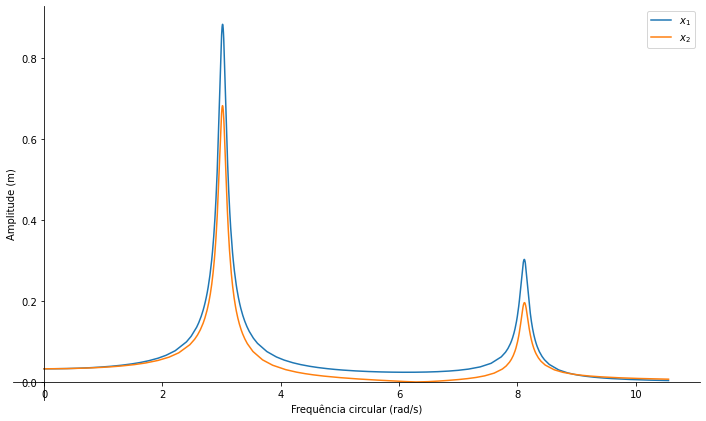

In [63]:
x1 = X[0]
x2 = X[1]
x1m = sp.sqrt(sp.re(x1)**2+sp.im(x1)**2).simplify() # A função embutida dá uma expressão muito complicada
x2m = sp.sqrt(sp.re(x2)**2+sp.im(x2)**2).simplify() # idem
display(x1m)
display(x2m)

p1 = sp.plot(x1m, (ω, 0, 1.3*ω_2), size=(10,6), xlabel="Frequência circular (rad/s)", ylabel="Amplitude (m)",
             show=False, label=r"$x_1$", legend=True) 
p2 = sp.plot(x2m, (ω, 0, 1.3*ω_2), show=False, label=r"$x_2$")
p1.extend(p2)
p1.show()

## Visualização da resposta

Excluindo o transiente é claro.

### Frequência da força de excitação

In [64]:
ω_f = 4.0 

In [65]:
x1w = x1.subs([(ω, ω_f)])
x2w = x2.subs([(ω, ω_f)])
display(x1w)
display(x2w)               
xt1 = sp.Abs(x1w)*sp.cos(ω_f*t+sp.arg(x1w))
xt2 = sp.Abs(x2w)*sp.cos(ω_f*t+sp.arg(x2w))
display(xt1)
display(xt2)

-0.0578540340167199 - 0.00376461295019326*I

2.10078847667034e-6*(-688.48 - 44.8*I)*(24.0 + 0.8*I)

-0.0579763879753866*cos(4.0*t + 0.0649792719389888)

-0.0348051528826866*cos(4.0*t + 0.0983002678172359)

### Resposta na forma gráfica

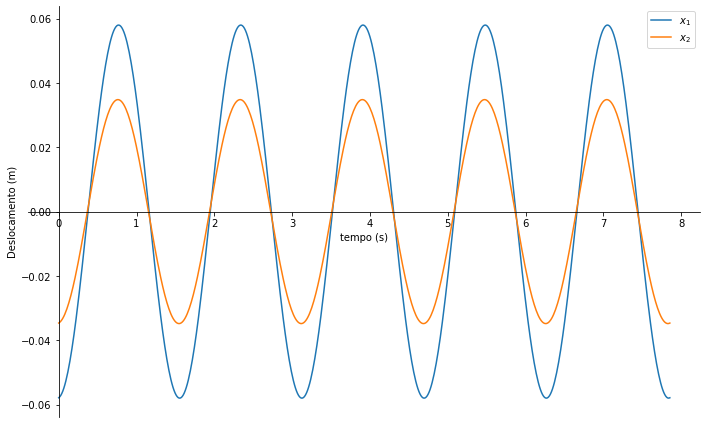

In [66]:
τe = 2*sp.pi/ω_f
p1 = sp.plot(xt1, (t, 0, 5*τe), size=(10,6), xlabel="tempo (s)", ylabel="Deslocamento (m)",
             show=False, label=r"$x_1$", legend=True, adaptive=False, nb_of_points=600) 
p2 = sp.plot(xt2, (t, 0, 5*τe), show=False, label=r"$x_2$", adaptive=False, nb_of_points=600)
p1.extend(p2)
p1.show()

## Animação

### Transformação para vetores do NumPy

Para trabalhar com o matplotlib, precisamos de vetores numéricos, não simbólicos do SymPy.

In [67]:
fxt1 = sp.lambdify(t, xt1, 'numpy')
fxt2 = sp.lambdify(t, xt2, 'numpy')

### Tempos para plotagem

Vamos fazer a animação por alguns períodos, e precisamos de um certo número de pontos em cada período para termos uma animação suave.

In [68]:
nτ = 3
npτ = 50
τ = 2*np.pi/ω_f
times = np.linspace(0, nτ*τ, nτ*npτ)

x1n = fxt1(times)
x2n = fxt2(times)

### Valores máximos

Para determinar os limites de plotagem.

In [69]:
max1 = x1n.max()
max2 = x2n.max()
print(max1, max2)

lref = max1+max2     # comprimento de referência
fuzz = 1.35          # uma folga
min_dist = fuzz*lref

max_dist = fuzz*2.0*(max1+max2)
lshape = 0.15*lref   # comprimento característo das massas

bbminx = -fuzz*max1
bbmaxx = min_dist+fuzz*max2
bbminy = -2*lshape
bbmaxy = 2*lshape
bbdx = bbmaxx - bbminx
bbdy = bbmaxy - bbminy
print(bbminx, bbmaxx)
print(bbminy, bbmaxy)

x2n += min_dist                 # to plot m2 on correct place

0.057976301644533344 0.03480427010208263
-0.07826800722012002 0.17223953649574314
-0.02783417152398479 0.02783417152398479


## Cria animação

In [72]:
m1 = Ellipse((x1n[0],0), width=lshape, height=0.5*lshape, fc='blue')
m2 = Ellipse((x2n[0],0), width=lshape, height=0.5*lshape, fc='red')
patches = PatchCollection([m1, m2])

ar = bbdx/bbdy
fig, ax = plt.subplots()

def init():
    fig.set_size_inches(14, 14/ar)
    ax.set_xlim(left=bbminx, right=bbmaxx)
    ax.set_ylim(bottom=bbminy, top=bbmaxy)
    ax.add_patch(m1)
    ax.add_patch(m2)
    m1.center = (x1n[0], 0)
    m2.center = (x2n[0], 0)
    return m1, m2

    
def animate(i):
    m1.center = (x1n[i], 0)
    m2.center = (x2n[i], 0)
    return m1, m2

anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=x1n.size, 
                               interval=30,
                               blit=True)
plt.close(fig)

## Apresenta animação

In [73]:
HTML(anim.to_html5_video())